# Tutorial 1
Question proposed by teacher and answers done by Chensheng LUO of CentraleSupélec

## Exercise 1

The aim is to evaluate the reliability of a heat exchanger. Through testing we get the following
numbers for all modes of failures:
- Mean number of failures per 106 hours: 96.93  

We assume that the global failure rate of the heat exchanger is constant.

5. Estimate the failure rate using intervals of length 50000/10 = 5000h.

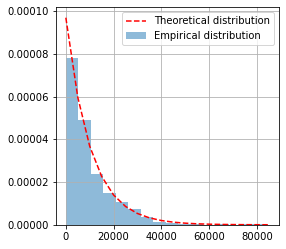

In [73]:
from scipy.stats import expon
import matplotlib.pyplot as plt

lambda_value=96.93e-6
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

## Statistic-Empirical
r = expon.rvs(size=1000,scale=1/lambda_value)
number= int((max(r)-min(r))/5000)
ax.hist(r, bins=number,density=True, alpha=0.5, label='Empirical distribution')

## Theoretical distribution
xlim = ax.get_xlim()
vx = np.arange(0, xlim[1], 5000)
vy = expon.pdf(vx, scale=1/lambda_value)
ax.plot(vx, vy, 'r--', label='Theoretical distribution')

ax.grid(True)
ax.legend(loc='upper right')


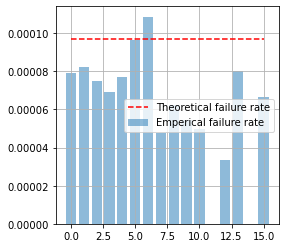

In [77]:
## Estimation of failure rate
lis=[0]*(number+1)
for i in r:
    lis[int(i/5000)] += 1

a = sum(lis)
for i in range(len(lis)):
    lis[i]=lis[i]/a

failure=[0]*(number)
for j in range(len(failure)):
    remained = 0
    for k in range(j,len(lis)):
        remained += lis[k]
    failure[j] = lis[j]/remained/5000

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.bar(range(len(failure)), failure,alpha=0.5,label='Emperical failure rate')
vx = np.full(len(failure),lambda_value)
ax.plot(range(len(failure)), vx, 'r--', label='Theoretical failure rate')
ax.grid(True)
ax.legend()

6. Proceed again to the estimation of the failure rate with a Weibull distribution

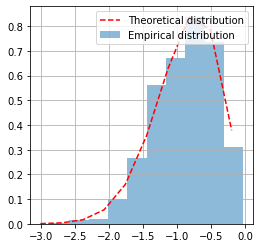

In [87]:
from scipy.stats import weibull_max
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

## Statistic-Empirical
r = weibull_max.rvs(2,size=1000)
number=10
ax.hist(r, bins=number,density=True, alpha=0.5, label='Empirical distribution')

## Theoretical distribution
xlim = ax.get_xlim()
step = (xlim[1]-xlim[0])/number
vx = np.arange(xlim[0], xlim[1], step)
vy = weibull_max.pdf(vx,2)
ax.plot(vx, vy, 'r--', label='Theoretical distribution')

ax.grid(True)
ax.legend(loc='upper right')

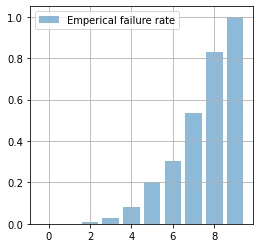

In [89]:
## Estimation of failure rate
lis=[0]*(number+1)
for i in r:
    lis[int((i-xlim[0])/step)] += 1

a = sum(lis)
for i in range(len(lis)):
    lis[i]=lis[i]/a

failure=[0]*(number)
for j in range(len(failure)):
    remained = 0
    for k in range(j,len(lis)):
        remained += lis[k]
    failure[j] = lis[j]/remained

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.bar(range(len(failure)), failure,alpha=0.5,label='Emperical failure rate')
ax.grid(True)
ax.legend()

## Exercise 2